In [182]:
from utils.all import *

# There's also 'tutorial' and 'preliminary' data
data = load_data('../annotated', preprocess=True) # batch_num=1,

Loading files: ['../annotated/batch_1_anton.json', '../annotated/batch_1_ayush.json', '../annotated/batch_1_kelly.json', '../annotated/batch_2_vinayak.json', '../annotated/batch_2_vishnesh.json', '../annotated/batch_3_anton.json', '../annotated/batch_3_ayush.json', '../annotated/batch_3_kelly.json', '../annotated/batch_4_rachel.json', '../annotated/batch_4_vinayak.json', '../annotated/batch_4_vishnesh.json', '../annotated/batch_5_anton.json', '../annotated/batch_5_ayush.json', '../annotated/batch_5_kelly.json', '../annotated/batch_5_rachel.json', '../annotated/batch_5_vinayak.json', '../annotated/batch_5_vishnesh.json', '../annotated/batch_6_anton.json', '../annotated/batch_6_ayush.json', '../annotated/batch_6_kelly.json', '../annotated/batch_6_rachel.json', '../annotated/batch_6_vinayak.json', '../annotated/batch_6_vishnesh.json']

Found users: {'anton', 'vinayak', 'kelly', 'ayush', 'rachel', 'vishnesh'}

anton - Batch 5, HIT 38 (ID 177) has 2 deletion edits but 1 annotations. Likely 

In [2]:
# Show the agreement with SimpEval
# simpeval_agreement(data)

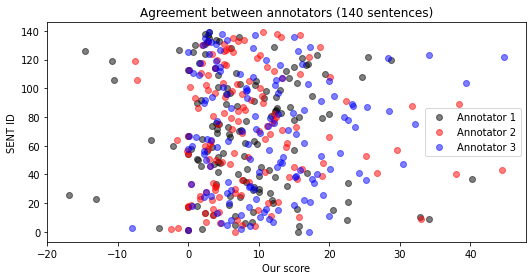

In [3]:
# Calculate the inter-annotator agreement on sentence-level scores
final = []
MAX_HIT = max([x['id'] for x in data])+1
for sent_id in range(0, MAX_HIT):
    sents = [x for x in data if x['id'] == sent_id]
    scores = [x['score'] for x in sents]
    
    # Delete this: if not all scores are present, skip this sentence
    if len(scores) != 3:
        continue
    
    final.append(scores)

# Plot the scores for each sentence
ann_mapping = {
    0: 'black',
    1: 'red',
    2: 'blue'
}
for ann in range(0, 3):
    pts = [(i, score) for i, score in enumerate([x[ann] for x in final])]
    plt.scatter([p[1] for p in pts], [p[0] for p in pts], c=ann_mapping[ann], alpha=0.5, label=f'Annotator {ann+1}')
plt.xlabel('Our score')
plt.ylabel('SENT ID')
plt.title(f'Agreement between annotators ({len(pts)} sentences)')
plt.rcParams["figure.figsize"] = (10, 5)
plt.legend()
plt.show()

In [4]:
# Calculates Rough Span Agreement Score
# TODO: Does not work for multiple batches
total_agreement = []
MAX_HIT = max([x['id'] for x in data])+1
for sent_id in range(0, MAX_HIT):
    sents = [x for x in data if x['id'] == sent_id]
    orig_tokens = get_annotations_per_token(sents, 'original')
    simp_tokens = get_annotations_per_token(sents, 'simplified')
    agg_score = 0
    for val in list(orig_tokens.values()) + list(simp_tokens.values()):
        agg_score += (list(val.values())[0] - 3)
    total_agreement.append(agg_score)
print(f"Sent with full agreement {sum([x == 0 for x in total_agreement])} / {MAX_HIT}")
# hds = sorted([(i, val) for i, val in enumerate(total_agreement)], key=lambda x: x[1])
# print("\nHighest disagreement sentences:")
# for x in [get_sent_info(data[x[0]]) for x in hds][:5]:
#     print(x)

Sent with full agreement 7 / 149


In [5]:
# The problem right now is most disagreement is between structure and other changes
# However structure is a composite of other changes. So is it really *span* selection?
# We count structure twice. Once as a span itself, and once as each of its composite spans
# Hopefully agreement goes up? Might not...

In [6]:
# First need to add a new field to structure edits containing its composite edits. Basically just needs the spans and type
# Then, in the function, we modify the edits array to also include the composite edits.

In [7]:
sents[0]['edits']

[{'type': 'deletion',
  'id': 0,
  'original_span': [(174, 223)],
  'simplified_span': None,
  'annotation': ['bad', 'no', 'no']},
 {'type': 'substitution',
  'id': 0,
  'original_span': [(124, 132)],
  'simplified_span': [(117, 128)],
  'annotation': ['same', 'no', 'minor', '', 'no']},
 {'type': 'substitution',
  'id': 1,
  'original_span': [(164, 173)],
  'simplified_span': [(160, 165)],
  'annotation': ['same', 'positive', 'minor', '', 'no']},
 {'type': 'insertion',
  'id': 0,
  'original_span': None,
  'simplified_span': [(28, 39)],
  'annotation': ['elaboration', 'minor', 'no']},
 {'type': 'split',
  'id': 0,
  'original_span': [(228, 231)],
  'simplified_span': [(166, 168), (173, 176)],
  'annotation': ['positive', 'minor', '', 'no']},
 {'type': 'reorder',
  'id': 0,
  'original_span': [(4, 17)],
  'simplified_span': [(47, 61)],
  'annotation': ['positive', '', 'minor', 'no', 'component']},
 {'type': 'structure',
  'id': 0,
  'original_span': [(270, 275)],
  'simplified_span': [(

{(0, 10): {'substitution': 3, 'reorder': 1},
 (11, 19): {'substitution': 3, 'reorder': 1},
 (20, 26): {'reorder': 1},
 (27, 30): {'reorder': 1},
 (31, 34): {'reorder': 1},
 (35, 37): {'reorder': 1},
 (38, 49): {'reorder': 1},
 (50, 52): {'reorder': 1},
 (53, 66): {'reorder': 1},
 (81, 84): {'structure': 2, 'substitution': 1},
 (85, 90): {'structure': 2, 'substitution': 2},
 (91, 93): {'structure': 2, 'substitution': 1},
 (113, 116): {'structure': 2, 'deletion': 1},
 (117, 119): {'structure': 2, 'deletion': 1},
 (120, 123): {'structure': 1, 'reorder': 2},
 (124, 131): {'structure': 1, 'reorder': 2},
 (132, 141): {'structure': 1, 'reorder': 2},
 (142, 145): {'structure': 1, 'reorder': 2},
 (146, 150): {'structure': 1, 'reorder': 2},
 (151, 153): {'structure': 1, 'reorder': 2},
 (154, 158): {'structure': 1, 'reorder': 2},
 (159, 161): {'structure': 1, 'reorder': 2},
 (162, 167): {'structure': 1, 'reorder': 2},
 (168, 172): {'substitution': 1, 'deletion': 1},
 (173, 176): {'deletion': 1, '

{(0, 2): {'insertion': 2, 'substitution': 1},
 (3, 6): {'insertion': 3},
 (7, 12): {'substitution': 3, 'reorder': 1},
 (13, 21): {'substitution': 3, 'reorder': 1},
 (22, 28): {'reorder': 1},
 (29, 32): {'reorder': 1},
 (33, 36): {'reorder': 1},
 (37, 39): {'reorder': 1},
 (40, 51): {'reorder': 1},
 (52, 54): {'reorder': 1},
 (55, 68): {'reorder': 1},
 (72, 74): {'structure': 1, 'reorder': 2},
 (75, 80): {'structure': 1, 'reorder': 2},
 (81, 84): {'structure': 1, 'reorder': 2},
 (85, 92): {'structure': 1, 'reorder': 2},
 (93, 102): {'structure': 1, 'reorder': 2},
 (103, 106): {'structure': 1, 'reorder': 2},
 (107, 111): {'structure': 1, 'reorder': 2},
 (112, 114): {'structure': 1, 'reorder': 2},
 (115, 119): {'structure': 1, 'reorder': 2},
 (120, 128): {'structure': 2, 'substitution': 2},
 (148, 151): {'substitution': 1, 'insertion': 2},
 (152, 155): {'insertion': 1, 'substitution': 1},
 (156, 165): {'insertion': 1, 'substitution': 1, 'structure': 2},
 (166, 168): {'insertion': 2, 'stru

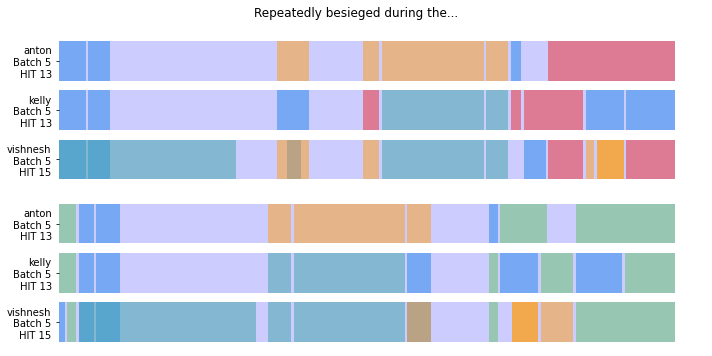

In [8]:
HID_ID = 12
sents = [x for x in data if x['id'] == HID_ID]
orig_tokens = get_annotations_per_token(sents, 'original')
simp_tokens = get_annotations_per_token(sents, 'simplified')

display(orig_tokens)
display(simp_tokens)
draw_agreement(sents)

In [9]:
# Calculates % Agreement
total_agreement = []
MAX_HIT = max([x['id'] for x in data])+1
for sent_id in range(0, MAX_HIT):
    sents = [x for x in data if x['id'] == sent_id]
    orig_tokens = get_annotations_per_token(sents, 'original')
    simp_tokens = get_annotations_per_token(sents, 'simplified')
    total_agreement += list(orig_tokens.values()) + list(simp_tokens.values())

for edit_type in edit_type_labels:
    out = {
        3: 0,
        2: 0,
        1: 0
    }
    for d in total_agreement:
        if edit_type in d.keys():
            if d[edit_type] not in out.keys():
                out[d[edit_type]] = 0
            out[d[edit_type]] += 1
    total = sum(out.values())
    # Avoid division by 0, doesn't change calculation at all
    total = 1 if total == 0 else total
    print(f'{edit_type}: {int(100*out[3]/total)} {int(100*out[2]/total)} {int(100*out[1]/total)}')

insertion: 14 28 56
deletion: 45 20 34
substitution: 31 29 39
split: 35 22 41
reorder: 15 22 62
structure: 5 25 68


In [38]:
from sklearn.metrics import cohen_kappa_score
import krippendorff
from statsmodels.stats.inter_rater import fleiss_kappa
from statsmodels.stats import inter_rater as irr

for edit in edit_type_labels:
    total_agreement = None
    MAX_HIT = max([x['id'] for x in data])+1
    for sent_id in range(0, MAX_HIT):
        sents = [x for x in data if x['id'] == sent_id]
        final = []
        for sent in sents:
            tokens_orig = get_annotations_per_token([sent], 'original', remove_none=False)
            tokens_simp = get_annotations_per_token([sent], 'simplified', remove_none=False)
            all_edits = list(tokens_orig.values()) + list(tokens_simp.values())
            formatted = []
            for edits in all_edits:
                if edit in edits.keys():
                    formatted += [1]
                else:
                    formatted += [0]
                # formatted += [nx]
            final += [formatted]
        
        if len(sents) == 3:
            if total_agreement is None:
                total_agreement = np.asarray(final)
            else:
                total_agreement = np.append(total_agreement, np.asarray(final), axis=1)
    
    # Delete columns with all 0s
    # idx = np.argwhere(np.all(total_agreement[..., :] == 0, axis=0))
    # total_agreement = np.delete(total_agreement, idx, axis=1)

    
    value_counts = total_agreement
    print(f"{edit} ({total_agreement.shape[1]} tokens)")
    # Having trouble formatting the krippendorff alpha
    # print(krippendorff.alpha(value_counts=value_counts, level_of_measurement='nominal'))
    print(cohen_kappa_score(total_agreement[0, :], total_agreement[1, :]))
    print(cohen_kappa_score(total_agreement[1, :], total_agreement[2, :]))
    print(cohen_kappa_score(total_agreement[0, :], total_agreement[2, :]))
    agg = irr.aggregate_raters(total_agreement.T)
    print(irr.fleiss_kappa(agg[0], method='fleiss'), end='\n\n')

insertion (11022 tokens)
0.4527461097759069
0.4462389590843192
0.47126244553188734
0.4558166353484535

deletion (11022 tokens)
0.7297268388797764
0.7314174734569764
0.7366579863349233
0.7325006580246097

substitution (11022 tokens)
0.6163988349550245
0.6278904438566214
0.596050243217787
0.6131066306587507

split (11022 tokens)
0.7040407310221989
0.695191214139787
0.6804401280703101
0.6933227454527482

reorder (11022 tokens)
0.39064009722427995
0.4872664357173495
0.40013818620835717
0.4274911260778274

structure (11022 tokens)
0.23578379367015068
0.3269079943191575
0.25344440996828244
0.2737468895565557



In [195]:
# Calculates agreement for errors
error = Error.BAD_DELETION

def get_error_stats(error):
    total_agreement = None
    MAX_HIT = max([x['id'] for x in data])+1
    for sent_id in range(0, MAX_HIT):
        sents = [x for x in data if x['id'] == sent_id]

        sents_errors = []
        for sent in sents:
            errors = []
            for ann in sent['processed_annotations']:
                if (error.value == 'grammar_error' and ann['grammar_error']) or ann['error_type'] == error:
                    errors += [1]
                else:
                    errors += [0]
            sents_errors += [1 if any(errors) == True else 0]

        # Converts error array to 0/1 mapping using alphabetical ordering
        if len(sents_errors) == 3:
            if total_agreement is None:
                total_agreement = np.asarray([sents_errors])
            else:
                total_agreement = np.append(total_agreement, np.asarray([sents_errors]), axis=0)

    if total_agreement.sum() == 0:
        print(f'No {error.value} errors', end='\n\n')
        return

    print(error.value)
    agg = irr.aggregate_raters(total_agreement)
    print(irr.fleiss_kappa(agg[0], method='fleiss'))

    # Delete columns with all 0s
    total_agreement = total_agreement.T
    idx = np.argwhere(np.all(total_agreement[..., :] == 0, axis=0))
    total_agreement = np.delete(total_agreement, idx, axis=1)
    total_agreement = total_agreement.T

    # % two agree
    two_agree = []
    for entry in total_agreement:
        two_agree.append(np.sum(entry) >= 2)
    print(sum(two_agree) / total_agreement.shape[0])

    # % frequency
    print(len(total_agreement) / MAX_HIT, end='\n\n')

class Tmp(Enum):
    GRAMMAR_ERROR = 'grammar_error'

for error in [e for e in Error] + [Tmp.GRAMMAR_ERROR]:
    get_error_stats(error)

No Coreference errors

Repetition
0.45996226810606805
0.4444444444444444
0.06228373702422145

Contradiction
-0.007331378299134136
0.0
0.01730103806228374

No Hallucination errors

Irrelevant
0.10031430068098625
0.15
0.06920415224913495

Information Rewrite
0.2586940436551979
0.2631578947368421
0.1314878892733564

Bad Deletion
0.4343214181923857
0.5798319327731093
0.4117647058823529

Bad Reorder
0.17236586043925553
0.18518518518518517
0.09342560553633218

Bad Structure
0.006529360210342048
0.06060606060606061
0.11418685121107267

Bad Split
0.37274594841360065
0.3333333333333333
0.031141868512110725

Unnecessary Insertion
0.3446127946127956
0.3157894736842105
0.0657439446366782

Complex Wording
0.14392523364485954
0.1891891891891892
0.12802768166089964

grammar_error
0.11162348118869772
0.2037037037037037
0.18685121107266436



In [203]:
# Calculates sentence-score agreement
total_agreement = None
MAX_HIT = max([x['id'] for x in data])+1
for sent_id in range(0, MAX_HIT):
    sents = [x for x in data if x['id'] == sent_id]
    scores = [sent['score'] for sent in sents]
    if len(scores) == 3:
        if total_agreement is None:
            total_agreement = np.asarray([scores])
        else:
            total_agreement = np.append(total_agreement, np.asarray([scores]), axis=0)

import scipy.stats as kendalltau
import scipy.stats as pearsonr
tau, p_value = stats.kendalltau(total_agreement[:, 1], total_agreement[:, 2])
r, p_value = stats.pearsonr(total_agreement[:, 1], total_agreement[:, 2])
print(tau)
print(r)

0.05714467813894199



In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
ann1, ann2 = [], []

for d in total_agreement:
    # Big asterisk, but we ignore 3 way disagreements
    ks = list(d.keys())
    if len(ks) == 2:
        ann1.append(ks[0])
        ann2.append(ks[1])

a = confusion_matrix(ann1, ann2, labels=edit_type_labels)
df_cm = pd.DataFrame(a, index = [i for i in edit_type_labels],
                  columns = [i for i in edit_type_labels])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [15]:
# Some examples of high disagreement
# This isn't the correct way to calculate disagreement between the scores
# high_disagreement = [y[1] for y in sorted([(abs(x[0] - x[1]), i) for i, x in enumerate(scores) if x[0] != 0], reverse=True)][:5]
# for idx in high_disagreement:
#     example = data[idx]
#     print(f'HIT {example["id"] + 1}\nAnnotator: {example["user"]}\nSimpEval Score: {example["simpeval_scores"]}\nOur Score: {example["score"]}\nSystem: {system_name_mapping[example["system"]]}\n')

In [16]:
# Krippendorff's alpha = calculated by a token being labeled between
# annotators

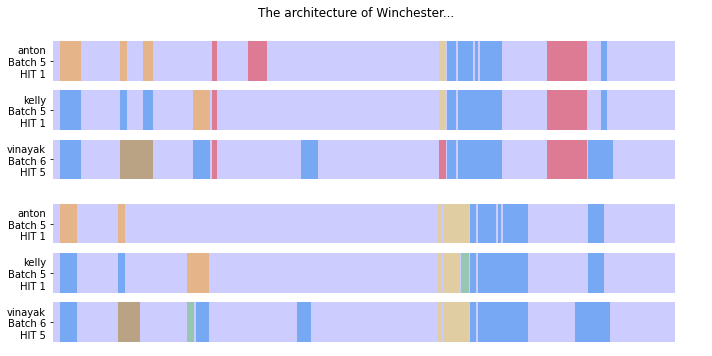

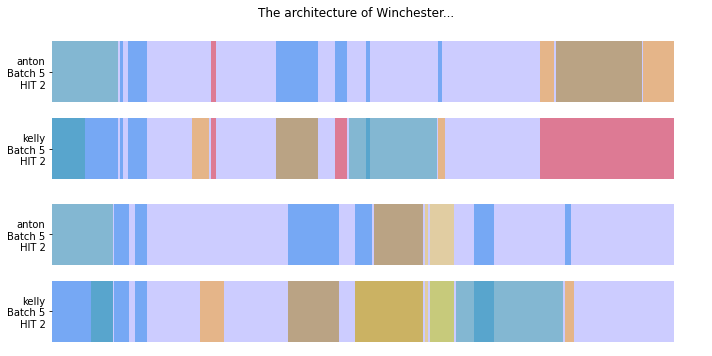

In [17]:
# Display the agreeement on all sentences
# MAX_HIT = max([x['id'] for x in data])+1
MAX_HIT = 2
for sent_id in range(0, MAX_HIT):
    sents = [x for x in data if x['id'] == sent_id]
    draw_agreement(sents)